## Observations and Insights 

In [575]:
# import dep
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# data files to work with
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"


# read those bad boys
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# combine into one
mouse_study_merge = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

In [576]:
# Checking the number of mice in the merged DataFrame
mouse_count = mouse_study_merge["Mouse ID"].count()

# Check study results for duplicates
mouse_meta_unique = mouse_metadata["Mouse ID"].count()
study_results_unique = study_results["Mouse ID"].nunique()

# check to see if equal number of mice exist
datapoint_count = mouse_meta_unique == study_results_unique

print(f"Merged data point count: {mouse_count}")
print(f"Mouse Meta Data Mice: {mouse_meta_unique}")
print(f"Study Results Unique: {study_results_unique}")
print(f"Equal number of mice?: {datapoint_count}")
print(f"the mitochondria is the power house of the cell")

Merged data point count: 1893
Mouse Meta Data Mice: 249
Study Results Unique: 249
Equal number of mice?: True
the mitochondria is the power house of the cell


In [577]:
# Drop duplicates
mouse_study = mouse_study_merge.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [578]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = mouse_study["Mouse ID"].count()
mouse_count2

1888

## Summary Statistics
Generate a summary statistics table of mean, median, variance, standard deviation, 
and SEM of the tumor volume for each drug regimen

In [579]:
# subset the merged data frame to only drug, timepoint, and tumor volume
sumstat = mouse_study.groupby("Drug Regimen").agg(

#x be stats, y be drug reigmen, calc each tumor volume * drug

# Average Tumor Volume
    Average = ('Tumor Volume (mm3)', np.mean),
# Median Tumor Volume
    Median = ('Tumor Volume (mm3)', np.median),
#Variance of the Tumor Volume
    Variance = ('Tumor Volume (mm3)', np.var),
#Standard Deviation of the Tumor Volume
    Std_Dev = ('Tumor Volume (mm3)', np.std),
#Standard error of the mean of the Tumor Volume
    SEM = ('Tumor Volume (mm3)', st.sem))

# make into a data frame
sumstats = pd.DataFrame(data = sumstat)
# print the result
sumstats.round(3)

,Average,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar Plots

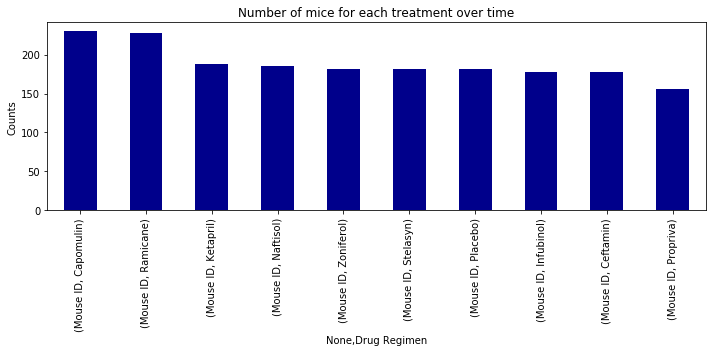

In [580]:
# number of mice PER time point FOR each treatment dataframe
mice_treat_bar_py = pd.DataFrame(mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"])
mice_treat_bar_py = mice_treat_bar_py.unstack(level = 1).sort_values(ascending=False)

# Use DataFrame.plot() from pandas in order to create a bar chart of the data
mice_treat_bar_py.plot(kind="bar", figsize=(10,5), color = "darkblue")
plt.title("Number of mice for each treatment over time")
plt.ylabel('Counts') 

# make it neat
plt.tight_layout()
plt.show()

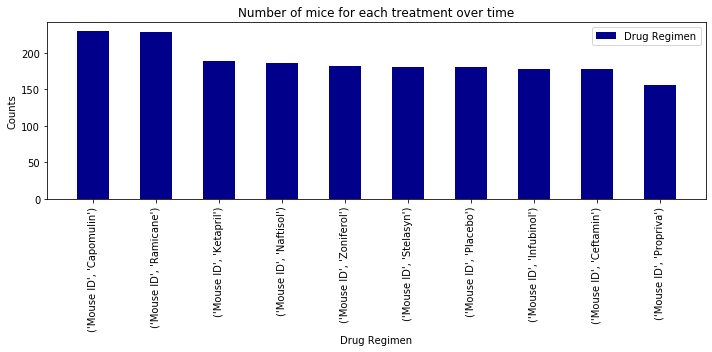

In [581]:
# number of mice PER time point FOR each treatment dataframe
mice_treat_bar_py = pd.DataFrame(mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"])
mice_treat_bar_py = mice_treat_bar_py.unstack(level = 1).sort_values(ascending=False)

# define vari and x ticks
x_axis = np.arange(len(mice_treat_bar_py))
tick_locations = [value for value in x_axis]

# make it pretty
plt.figure(figsize=(10,5))
plt.bar(x_axis, mice_treat_bar_py, align ='center', width = 0.5, color = "DarkBlue")
plt.xticks(tick_locations, list(mice_treat_bar_py.index), rotation='vertical')
plt.title('Number of mice for each treatment over time')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts') 
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")   
plt.tight_layout()
plt.show()

## Pie Plots

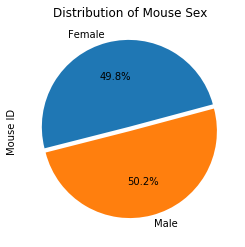

In [582]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# define variables
mouse_sex = mouse_study.groupby("Sex")
mouse_sex_count = pd.DataFrame(mouse_sex["Mouse ID"].nunique())
explode = (0.05, 0)

# plot variables
mouse_sex_count.plot(kind = "pie", y = "Mouse ID", explode = explode, legend = False, 
                     startangle = 15, autopct="%1.1f%%", title = "Distribution of Mouse Sex")

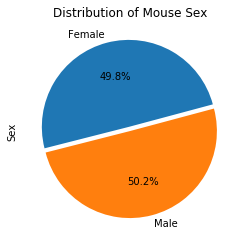

In [583]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# define variables
genders_labels = list(mouse_sex_count.index.values)
mouse_sex_np = mouse_sex_count["Mouse ID"]

# plot variables
plt.pie(mouse_sex_np, explode = explode, labels=genders_labels, 
        autopct="%1.1f%%", pctdistance=0.6, labeldistance=1.1,  
        center=(0, 0), frame=False, startangle= 15, rotatelabels=False)
plt.title('Distribution of Mouse Sex')
plt.ylabel('Sex') 
plt.show()

## Quartiles, Outliers and Boxplots

In [593]:
# Find the top performing drugs from the stat table select smallest four and list the drugs
best_drugs = pd.DataFrame(sumstats["Average"].round(3).nsmallest(4)).transpose()
best_drugs = list(best_drugs.columns.values)
best_drugs

['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin']

In [592]:
# Note all this is shit doe and people dont listen to data hence
best_drogas = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
best_drogas

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [585]:
iqr = mouse_study.groupby("Mouse ID").max().reset_index()
outlier = iqr[["Mouse ID", "Timepoint"]].merge(mouse_study, on = ["Mouse ID", "Timepoint"])

capomulin = outlier.loc[outlier["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ceftamin = outlier.loc[outlier["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
infubinol = outlier.loc[outlier["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ramicane = outlier.loc[outlier["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]

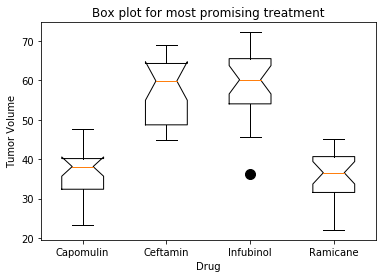

In [586]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker = dict(markerfacecolor = "black", markersize = 10)
plt.boxplot([capomulin, ceftamin, infubinol, ramicane], notch = True, widths = 0.5,  
            labels=["Capomulin", "Ceftamin", "Infubinol", "Ramicane"], flierprops=marker)
plt.title("Box plot for most promising treatment")
plt.xlabel("Drug")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

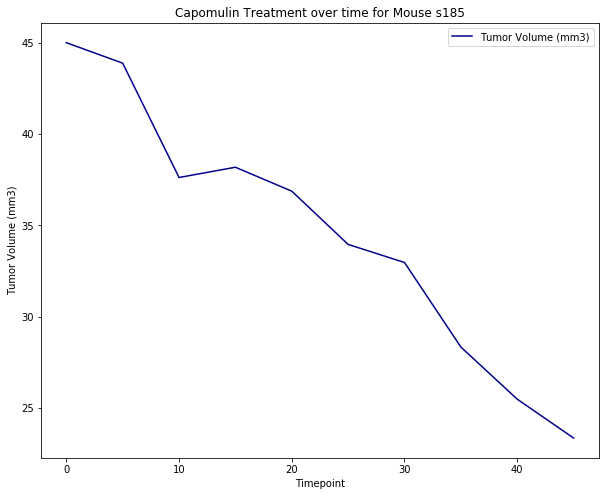

In [587]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
mouse_capomulin_s185 = mouse_study.loc[mouse_study["Mouse ID"] == "s185"]
mouse_capomulin_s185_line = mouse_capomulin_s185[["Timepoint", "Tumor Volume (mm3)"]]

mouse_capomulin_s185_line.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)",
                                figsize=(10,8), color = "darkblue")
plt.title("Capomulin Treatment over time for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show

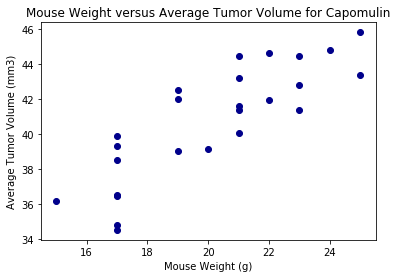

In [588]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor_cap = mouse_capomulin.groupby(["Mouse ID"]).mean()
weight_tumor = avg_tumor_cap[["Weight (g)", "Tumor Volume (mm3)"]]

plt.scatter(weight_tumor["Weight (g)"], weight_tumor["Tumor Volume (mm3)"], 
           color = "darkblue")
plt.title("Mouse Weight versus Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

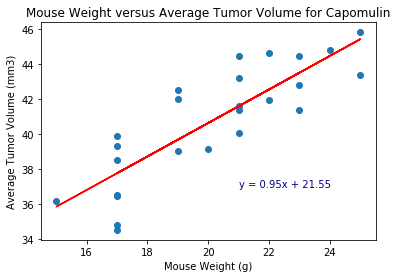

Correlation Coefficient: 0.842
R-squared: 0.842
y = 0.95x + 21.55


In [589]:
# Calculate the correlation coefficient 
corr_coeff = st.pearsonr(weight_tumor["Weight (g)"], weight_tumor["Tumor Volume (mm3)"])

# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_tumor["Weight (g)"]
y_values = weight_tumor["Tumor Volume (mm3)"]

# Calc slope
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make it pretty
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(21,37),fontsize=10,color="darkblue")
plt.title("Mouse Weight versus Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# print Correlation Coefficient, R-squared value, and line equation
print(f"Correlation Coefficient: {round(corr_coeff[0],3)}")
print(f"R-squared: {round((rvalue),3)}")
print(f"{line_eq}")

## Conclusions

1. Capomulin is a viable treatment option for diminishing tumor and reducing tumor growth rate. The lineplot shows that tumor growth was diminished over the time points while using capomulin. The box and whisker plot also show that the tumor volume is the lowest as well.

2. The correlation shows that there is a positive correlation between tumor volume and mouse weight. These factors mean that the more a mouse weighs the bigger the mouses tumor wil be. There is a relatively strong correlation attached to this at .842.

3. The best drugs for reducing the average tumor volume is Ramicane, Capomulin, Propriva, and Ceftamin; in that order. It would make sense for a future study to look into the effect of the other drugs and see how these drugs could effect tumor growth in the mice.